# Salary Distribution Across Data-Related Job Titles in the U.S by Using `baxplot`

In [2]:
# Importing Libraries
import ast
import matplotlib.pyplot as plt
import pandas as pd
from datasets import load_dataset

# Getting the data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

c:\Users\Huawei\.cache\kagglehub\datasets\ankushpanday1\global-population-dataset-20142024\versions\1\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Here I used Pyplot to compare Data Analyst, Business Analyst and Data Scientist

C:\Users\Huawei\AppData\Local\Temp\ipykernel_13772\412903145.py:16: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels=job_titles, vert=False)


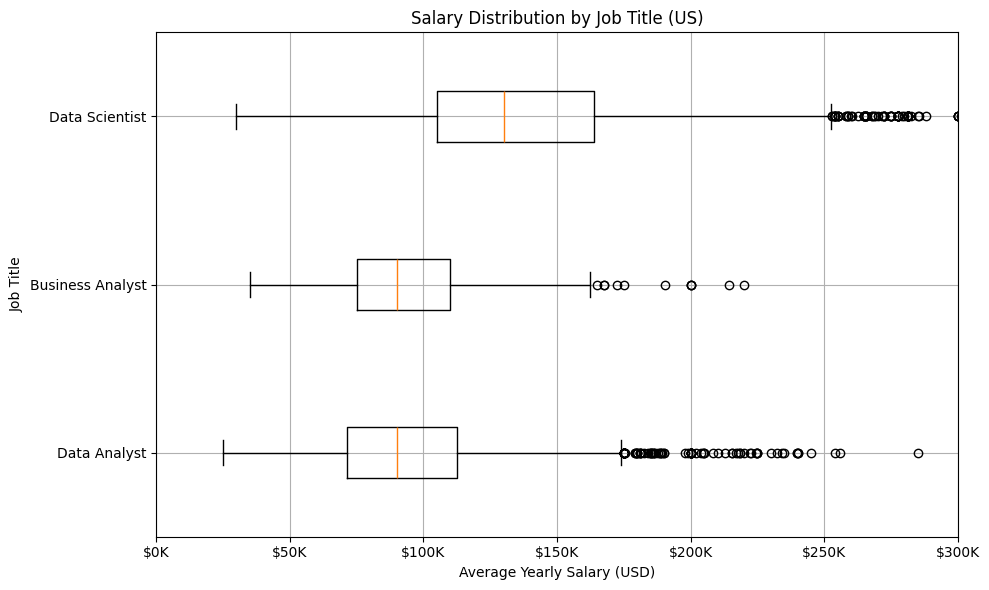

In [3]:
# Define job titles of interest
job_titles = ['Data Analyst', 'Business Analyst', 'Data Scientist']

# Filter dataset for selected job titles and U.S. location
df_US = df[(df['job_title_short'].isin(job_titles)) & 
           (df['job_country'] == 'United States')].copy()

# Drop rows with missing salary data
df_US = df_US.dropna(subset=['salary_year_avg'])

# Extract salary data for each job title
job_list = [df_US[df_US['job_title_short'] == title]['salary_year_avg'] for title in job_titles]

# Create horizontal boxplot to compare salary distributions
plt.figure(figsize=(10, 6))
plt.boxplot(job_list, labels=job_titles, vert=False)

# Add title and axis labels
plt.title('Salary Distribution by Job Title (US)')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('Job Title')

# Format salary axis to display in $K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Improve readability
plt.grid(True)
plt.xlim(0, 300000)
plt.tight_layout()

# Display the plot
plt.show()

## I Used `seaborn` to Make Visualization better

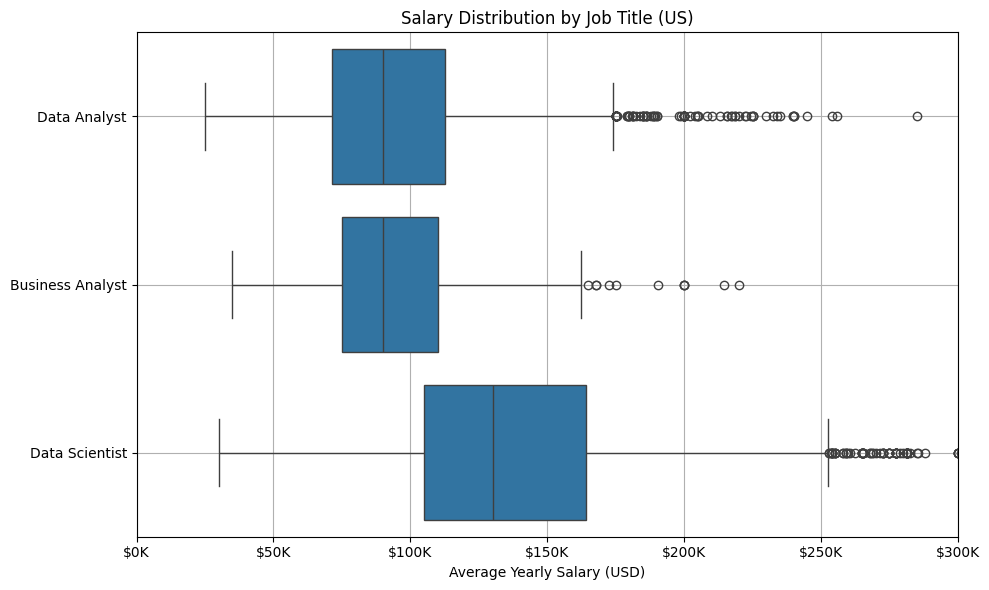

In [4]:
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create boxplot of average yearly salary by job title
sns.boxplot(
    data=df_US, 
    x='salary_year_avg', 
    y='job_title_short', 
    order=job_titles
)

# Limit x-axis to reduce outlier impact
plt.xlim(0, 300000)

# Add title and axis labels
plt.title('Salary Distribution by Job Title (US)')
plt.xlabel('Average Yearly Salary (USD)')
plt.ylabel('')

# Format x-axis to show values in $K
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${int(x/1000)}K'))

# Add grid and optimize layout
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()